In [1]:
import xarray as xr
import pandas as pd
import sys
sys.path.append('../')
from utilities.era5_down import annual_smb_glacier
from utilities.plot_results import plot_smb
import numpy as np

In [2]:

glaciers_smb = ['HURD', 'JOHNSONS', 'BELLINGSHAUSEN']
df_smb = pd.read_csv('../data/mass_balance/SSI_SMB.csv', sep='\t', index_col=['YEAR'])


In [3]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


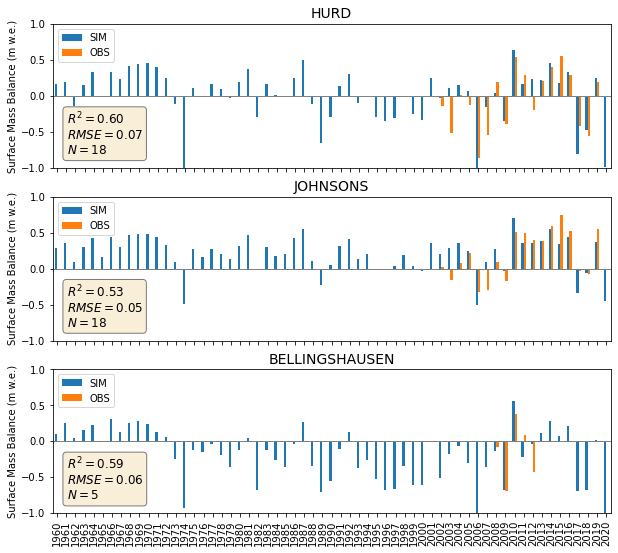

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,9), sharex=True) 
## HURD_1960_2020
dsg = xr.open_dataset('../data/out/HURD_1960_2020.nc')
df_all = annual_smb_glacier(dsg, df_smb, glaciers_smb[0])
df_all_st = df_all.copy().dropna()
y1 = df_all_st['OBS'].values
y2 = df_all_st['SIM'].values
textstr = '\n'.join((
r'$R^2=%.2f$' % (r2_score(y1, y2), ),
r'$RMSE=%.2f$' % (mean_squared_error(y1, y2), ),
r'$N=%.0f$' % (len(y1)), ))
df_all.plot.bar(ax = ax1)
ax1.set_xlabel('')
ax1.set_ylabel(u'Surface Mass Balance (m w.e.)') 
ax1.set_ylim(-1.0, 1.0)
ax1.legend(loc='upper left')

# Vamos agregar un caja para que se muestre los indicadores estadísticos. Aquí configuramos los propiedades de la caja
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# Ahora podemos agregar nuestros indicadores estadísticos
plt.text(0.025, 2.8, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax1.axhline(0, linewidth=1, color='grey', linestyle ='-')
ax1.set_title(glaciers_smb[0], fontsize=14)
## JOHNSONS_1960_2020
dsg = xr.open_dataset('../data/out/JOHNSONS_1960_2020.nc')
df_all = annual_smb_glacier(dsg, df_smb, glaciers_smb[1])
df_all_st = df_all.copy().dropna()
y1 = df_all_st['OBS'].values
y2 = df_all_st['SIM'].values
textstr = '\n'.join((
r'$R^2=%.2f$' % (r2_score(y1, y2), ),
r'$RMSE=%.2f$' % (mean_squared_error(y1, y2), ),
r'$N=%.0f$' % (len(y1)), ))
df_all.plot.bar(ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel(u'Surface Mass Balance (m w.e.)') 
ax2.set_ylim(-1.0, 1.0)
ax2.legend(loc='upper left')
# Vamos agregar un caja para que se muestre los indicadores estadísticos. Aquí configuramos los propiedades de la caja
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# Ahora podemos agregar nuestros indicadores estadísticos
plt.text(0.025, 1.60, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax2.axhline(0, linewidth=1, color='grey', linestyle ='-')
ax2.set_title(glaciers_smb[1], fontsize=14)

## BELLINGSHAUSEN_1960_2020
dsg = xr.open_dataset('../data/out/BELLINGSHAUSEN_1960_2020.nc')
df_all = annual_smb_glacier(dsg, df_smb, glaciers_smb[2])
df_all_st = df_all.copy().dropna()
y1 = df_all_st['OBS'].values
y2 = df_all_st['SIM'].values
textstr = '\n'.join((
r'$R^2=%.2f$' % (r2_score(y1, y2), ),
r'$RMSE=%.2f$' % (mean_squared_error(y1, y2), ),
r'$N=%.0f$' % (len(y1)), ))
df_all.plot.bar(ax = ax3)
ax3.set_xlabel('')
ax3.set_ylabel(u'Surface Mass Balance (m w.e.)') 
ax3.set_ylim(-1.0, 1.0)
ax3.legend(loc='upper left')
# Vamos agregar un caja para que se muestre los indicadores estadísticos. Aquí configuramos los propiedades de la caja
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# Ahora podemos agregar nuestros indicadores estadísticos
plt.text(0.025, 0.40, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax3.axhline(0, linewidth=1, color='grey', linestyle ='-')
ax3.set_title(glaciers_smb[2], fontsize=14)

fig.savefig('../fig/SMB_OBS_SIM_1960_2020.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)

In [6]:
dsg = xr.open_dataset('../data/out/HURD_1960_2020.nc')
df1 = dsg[['HGT', 'T2', 'PDD', 'SF', 'SMB', 'MELT', 'Q', 'RZ']].where(dsg['MASK']==1).mean(('lon', 'lat')).to_dataframe()
df1.to_csv('../data/out/HURD_1960_2020.csv', sep='\t', index=True)

dsg = xr.open_dataset('../data/out/JOHNSONS_1960_2020.nc')
df2 = dsg[['HGT', 'T2', 'PDD', 'SF', 'SMB', 'MELT', 'Q', 'RZ']].where(dsg['MASK']==1).mean(('lon', 'lat')).to_dataframe()
df2.to_csv('../data/out/JOHNSONS_1960_2020.csv', sep='\t', index=True)

dsg = xr.open_dataset('../data/out/BELLINGSHAUSEN_1960_2020.nc')
df3 = dsg[['HGT', 'T2', 'PDD', 'SF', 'SMB', 'MELT', 'Q', 'RZ']].where(dsg['MASK']==1).mean(('lon', 'lat')).to_dataframe()
df3.to_csv('../data/out/BELLINGSHAUSEN_1960_2020.csv', sep='\t', index=True)

In [7]:
df3

,HGT,T2,PDD,SF,SMB,MELT,Q,RZ
time,,,,,,,,
1959-01-01,130.348831,-0.330943,5.565953,0.028780,-0.048413,0.077192,0.068192,0.014937
1959-02-01,130.348831,-1.063417,0.915968,0.038195,0.025492,0.012703,0.005515,0.019742
1959-03-01,130.348831,-1.360896,3.505931,0.060583,0.011961,0.048623,0.029746,0.031253
1959-04-01,130.348831,-6.059883,0.000000,0.037331,0.037331,0.000000,0.000000,0.018730
1959-05-01,130.348831,-5.209905,0.010123,0.066319,0.066179,0.000140,0.000000,0.033447
...,...,...,...,...,...,...,...,...
2020-08-01,130.348831,-7.341003,0.408967,0.089383,0.083711,0.005672,0.000000,0.044506
2020-09-01,130.348831,-5.275929,0.006578,0.082930,0.082839,0.000091,0.000000,0.041806
2020-10-01,130.348831,-3.201353,0.003562,0.090194,0.090144,0.000049,0.000000,0.046026
